In [2]:
import pandas as pd
import scipy.stats as st
import scipy.special as sp
from scipy import stats
from scipy.stats import t
import matplotlib
import matplotlib.pyplot as plt

#read dataset
data = pd.read_csv('../dataset/athletes.csv')

In [3]:
# Mendapatkan min, max, mean, std
data['Medal'].describe() 

count    134731.000000
mean          0.295277
std           0.724716
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          28.000000
Name: Medal, dtype: float64

In [4]:
data['Medal'].mode()

0    0
dtype: int64

In [5]:
data['Medal'].median()

0.0

In [6]:
data['Medal'].var()

0.5252132778007574

In [7]:
data['Medal'].skew()

4.8199987845312

In [8]:
data['Medal'].kurtosis()

51.562525836059855

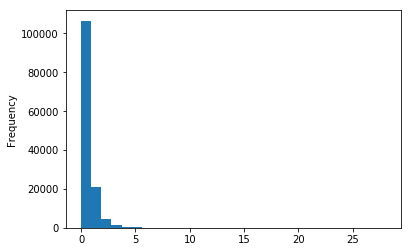

In [9]:
data['Medal'].plot.hist(bins=30)

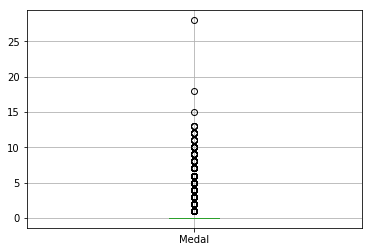

In [10]:
data.boxplot()

Akan dicoba dilihat kemiripan plotting data dengan distribusi gamma

In [11]:
# alfa * beta = mean
# alfa * beta * beta = var

beta = data['Medal'].var() / data['Medal'].mean()
alfa = data['Medal'].mean() / beta;
alfa, beta

(0.1660061953723104, 1.7787122673346367)

In [12]:
x_gamma = pd.DataFrame(np.random.gamma(alfa,beta,len(data.index)))
plt.hist([x_gamma[0].round(),data['Medal']],bins=30,label=["Gamma dist","Data"])
plt.legend(loc = 'upper right')
plt.show()

NameError: name 'np' is not defined

Dari plotting di atas, terlihat data cukup mirip dengan distribusi gamma, sehingga dipilih fungsi distribusi yaitu gamma

Soal a.1
Pada soal a.1, diketahui peluang seseorang tidak pernah mendapatkan medali (0 medali) yaitu X<=0.5 (dengan galat).
Maka peluangnya dapat dihitung dengan distribusi gamma F(0.5) = g(alfa, 0.5*beta) / Gamma(alfa).

In [13]:
sp.gammainc(alfa,0.5*beta)

0.9495725310243279

Soal a.ii
Pada soal a. ii, nilai x>=10+0.5, sehingga
P(x=>10.5) = 1 - P(x<=10.5)

In [14]:
1 - sp.gammainc(alfa,10.5*beta)

1.156553741665789e-10

Soal a.iii
Peluang x tepat 3 medali berarti
P (2.5<=x<=3.5)

In [15]:
sp.gammainc(alfa ,3.5*beta) - sp.gammainc(alfa,2.5*beta)

0.0004516462780106423

Soal a.iv. Peluang tepat 1 atau 5 medali, yaitu
P(0.5<=x<=1.5)+P(4.5<=x<=5.5)

In [16]:
sp.gammainc(alfa ,1.5*beta) - sp.gammainc(alfa,0.5*beta) + sp.gammainc(alfa ,5.5*beta) - sp.gammainc(alfa,4.5*beta)

0.04605229515401199

Soal b. confidence interval 95%
Selanjutnya adalah menentukan confidence interval 95%

In [19]:
confidence = 0.95
n = len(data.index)
mean = data['Medal'].mean()
std = stats.sem(data['Medal'].values)
h = std * t.ppf((1 + confidence) / 2, n - 1)
print("lower: ",str(mean-h))
print("upper: ",str(mean+h))

('lower: ', '0.29140747795632177')
('upper: ', '0.29914703436823603')
